In [2]:
import subprocess, sys

# Install required packages into the current kernel's Python
subprocess.check_call([sys.executable, "-m", "pip", "install", "--quiet",
                       "numpy", "pandas", "matplotlib", "seaborn"])
print("All packages installed.")

All packages installed.


In [3]:
# 01 - CICIoT2023 Exploration
# Run this notebook to inspect a sample of the raw flow data.

import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit nicer
sns.set(style="whitegrid")

# Paths
PROJECT_ROOT = Path("..").resolve()
RAW_DIR = PROJECT_ROOT / "data" / "raw"

RAW_DIR, list(RAW_DIR.glob("*.csv"))

Matplotlib is building the font cache; this may take a moment.


(WindowsPath('D:/Arka/T1_Thesis_Publication/Dissertation/attempt 2/data/raw'),
 [WindowsPath('D:/Arka/T1_Thesis_Publication/Dissertation/attempt 2/data/raw/test.csv'),
  WindowsPath('D:/Arka/T1_Thesis_Publication/Dissertation/attempt 2/data/raw/train.csv'),
  WindowsPath('D:/Arka/T1_Thesis_Publication/Dissertation/attempt 2/data/raw/validation.csv')])

In [4]:
# Load a sample of CICIoT2023 flows

# Pick a CSV file (adjust if needed)
RAW_FILE = next(iter(RAW_DIR.glob("*.csv")), None)
if RAW_FILE is None:
    raise FileNotFoundError("No CSV files found in data/raw/. Add a CICIoT2023 CSV there.")

print(f"Using file: {RAW_FILE}")

N_ROWS = 100_000  # sample size for quick exploration

df = pd.read_csv(RAW_FILE, nrows=N_ROWS, low_memory=False)
print("Shape:", df.shape)

df.head()

Using file: D:\Arka\T1_Thesis_Publication\Dissertation\attempt 2\data\raw\test.csv
Shape: (100000, 47)


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,5.018181,125.82,6.00,64.00,0.471037,0.471037,0.0,0.0,1.0,0.0,...,0.00000,54.00,8.336227e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1,0.000000,0.00,47.00,64.00,4.992473,4.992473,0.0,0.0,0.0,0.0,...,0.00000,592.00,8.367746e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,Mirai-greeth_flood
2,0.000000,55.22,6.05,65.27,31.735421,31.735421,0.0,0.0,0.0,0.0,...,0.77612,55.82,8.306829e+07,9.5,10.409427,1.111579,30.890194,0.02,141.55,DDoS-TCP_Flood
3,0.008299,5213.00,17.00,64.00,19365.300906,19365.300906,0.0,0.0,0.0,0.0,...,0.00000,50.00,8.310303e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,4.672666,108.00,6.00,64.00,0.428021,0.428021,0.0,0.0,0.0,0.0,...,0.00000,54.00,8.295115e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood


In [5]:
# Columns, dtypes, and basic info

print("\nColumn names (first 40):")
print(list(df.columns)[:40])

print("\nDtypes:\n")
print(df.dtypes)

print("\nMissing values (top 20 columns by count):")
missing = df.isna().sum().sort_values(ascending=False)
print(missing.head(20))

# Basic stats for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nNumeric columns ({len(numeric_cols)}):")
print(list(numeric_cols)[:40])

df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).T.head(30)


Column names (first 40):
['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT']

Dtypes:

flow_duration      float64
Header_Length      float64
Protocol Type      float64
Duration           float64
Rate               float64
Srate              float64
Drate              float64
fin_flag_number    float64
syn_flag_number    float64
rst_flag_number    float64
psh_flag_number    float64
ack_flag_number    float64
ece_flag_number    float64
cwr_flag_number    float64
ack_count          float64
syn_count          float64
fin_count          float64
urg_count          float64
rst_count          float6

,count,mean,std,min,25%,50%,75%,max
flow_duration,100000.0,5.345579,267.104517,0.0,0.000000,0.000000,0.103563,5.353950e+04
Header_Length,100000.0,76590.168764,459385.431210,0.0,54.000000,54.000000,253.785000,9.799668e+06
Protocol Type,100000.0,9.070181,8.961735,0.6,6.000000,6.000000,14.462500,4.700000e+01
Duration,100000.0,66.352133,14.040393,2.0,64.000000,64.000000,64.000000,2.550000e+02
Rate,100000.0,9086.717928,101469.577538,0.0,2.117763,15.783526,114.937516,7.340032e+06
Srate,100000.0,9086.717928,101469.577538,0.0,2.117763,15.783526,114.937516,7.340032e+06
Drate,100000.0,0.000002,0.000456,0.0,0.000000,0.000000,0.000000,1.430061e-01
fin_flag_number,100000.0,0.085730,0.279966,0.0,0.000000,0.000000,0.000000,1.000000e+00
syn_flag_number,100000.0,0.208610,0.406317,0.0,0.000000,0.000000,0.000000,1.000000e+00
rst_flag_number,100000.0,0.089530,0.285509,0.0,0.000000,0.000000,0.000000,1.000000e+00


Detected label column: label

Label counts:
label
DDoS-ICMP_Flood            15467
DDoS-UDP_Flood             11541
DDoS-TCP_Flood              9578
DDoS-SYN_Flood              8795
DDoS-PSHACK_Flood           8695
DDoS-RSTFINFlood            8575
DDoS-SynonymousIP_Flood     7710
DoS-UDP_Flood               7123
DoS-TCP_Flood               5753
DoS-SYN_Flood               4378
BenignTraffic               2370
Mirai-greeth_flood          2122
Mirai-udpplain              1985
Mirai-greip_flood           1627
DDoS-ICMP_Fragmentation     1018
MITM-ArpSpoofing             644
DDoS-ACK_Fragmentation       589
DDoS-UDP_Fragmentation       570
DNS_Spoofing                 390
Recon-HostDiscovery          271
Recon-OSScan                 205
Recon-PortScan               183
DoS-HTTP_Flood               139
VulnerabilityScan             84
DDoS-HTTP_Flood               55
DDoS-SlowLoris                51
DictionaryBruteForce          25
CommandInjection              12
SqlInjection              

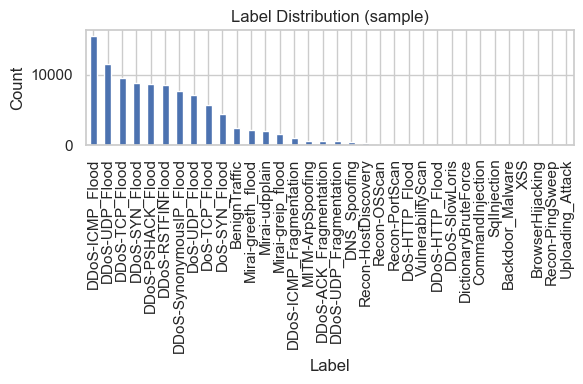

In [6]:
# Class / label distribution

# Try common label column names
label_candidates = ["label", "attack", "category", "Type", "Label"]
label_col = None
for c in label_candidates:
    if c in df.columns:
        label_col = c
        break

print("Detected label column:", label_col)

if label_col is not None:
    label_counts = df[label_col].value_counts(dropna=False)
    print("\nLabel counts:")
    print(label_counts)

    plt.figure(figsize=(6, 4))
    label_counts.plot(kind="bar")
    plt.title("Label Distribution (sample)")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No obvious label column found. Inspect df.columns and update label_candidates.")

In [7]:
# Separate flow feature columns vs metadata / identifiers

id_like = [
    c for c in df.columns
    if any(k in c.lower() for k in ["ip", "mac", "id", "host", "addr"])
]

# Time / index columns
time_like = [
    c for c in df.columns
    if any(k in c.lower() for k in ["time", "timestamp", "date"])
]

# Label column(s)
label_cols = [c for c in df.columns if c == label_col] if label_col is not None else []

# Numeric flow stats: numeric columns minus IDs, time, labels
flow_feature_cols = [
    c for c in df.select_dtypes(include=[np.number]).columns
    if c not in id_like and c not in time_like and c not in label_cols
]

print("Identifier-like columns:")
print(id_like)

print("\nTime-like columns:")
print(time_like)

print("\nLabel columns:")
print(label_cols)

print(f"\nCandidate flow feature columns ({len(flow_feature_cols)}):")
print(flow_feature_cols[:60])

# Quick stats for a subset of flow features
df[flow_feature_cols].describe(percentiles=[0.25, 0.5, 0.75]).T.head(20)

Identifier-like columns:
['IPv']

Time-like columns:
[]

Label columns:
['label']

Candidate flow feature columns (45):
['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']


,count,mean,std,min,25%,50%,75%,max
flow_duration,100000.0,5.345579,267.104517,0.0,0.000000,0.000000,0.103563,5.353950e+04
Header_Length,100000.0,76590.168764,459385.431210,0.0,54.000000,54.000000,253.785000,9.799668e+06
Protocol Type,100000.0,9.070181,8.961735,0.6,6.000000,6.000000,14.462500,4.700000e+01
Duration,100000.0,66.352133,14.040393,2.0,64.000000,64.000000,64.000000,2.550000e+02
Rate,100000.0,9086.717928,101469.577538,0.0,2.117763,15.783526,114.937516,7.340032e+06
Srate,100000.0,9086.717928,101469.577538,0.0,2.117763,15.783526,114.937516,7.340032e+06
Drate,100000.0,0.000002,0.000456,0.0,0.000000,0.000000,0.000000,1.430061e-01
fin_flag_number,100000.0,0.085730,0.279966,0.0,0.000000,0.000000,0.000000,1.000000e+00
syn_flag_number,100000.0,0.208610,0.406317,0.0,0.000000,0.000000,0.000000,1.000000e+00
rst_flag_number,100000.0,0.089530,0.285509,0.0,0.000000,0.000000,0.000000,1.000000e+00


## Next steps

- Use `id_like`, `time_like`, `label_cols`, and `flow_feature_cols` from this notebook to configure:
  - Which columns to keep as identifiers (`src_ip`, `dst_ip`) in preprocessing.
  - Which numeric columns to treat as **flow features** (for RF/MLP and GNN).
- Copy the selected `flow_feature_cols` list into `config/experiment.yaml` (under `data.flow_feature_columns`) before implementing the Day 2 preprocessing pipeline.
